# Character Wise RNN 
produces language

In [71]:
import torch
import numpy as np
from torch import nn
import torch.nn.functional as F

In [72]:
with open('data/urdu.txt', 'r',encoding='utf-8') as novel:
    text = novel.read()
#text = text[:100000]    

In [73]:
text[:1001]

'ہنگورجہ : مسافر وین کا گیس سلنڈر پھٹ گیا،12جاں بحق،12زخمی خیر پور…ہنگورجہ کے قریب مسافر وین کا گیس سلنڈر ہنگورجہ کے قریب اچانک دھماکے سے پھٹ گیا اور وین میں اگ لگ گئی،حادثے میں 12 مسافرجاں بحق اور10 زخمی ہوگئے۔پولیس کے مطابق مسافر وین سٹھارجہ سے ٹھری میرواہ جارہی تھی کہ ہنگورجہ کے قریب وین کا گیس سلنڈر اچانک پھٹ گیا، جس سے وین میں آگ بھڑک اٹھی۔ پولیس کے مطابق وین میں 25 سے 27 مسافر سوارتھے جو کہ ایک کاٹن فیکٹری سے مزدوری کے بعد اپنے گھروں کو واپس جارہے تھے ،حادثے کی شکار ہونے والی وین میں لگی ہوئی آگ کو اطراف کے دیہاتیوں نے اپنی مدد اپ کے تحت بجھایا جبکہ آگ بجھانے کا عملہ کافی دیر بعد جائے حادثہ پر پہنچا، جھلس کر زخمی ہونے والوں کو ہنگورجہ اور سٹھارجہ اسپتالوں منتقل کردیا گیا،10 زخمیوں میں سے 8 کی حالت تشویشناک بتائی جاتی ہے،تاہم زخمیوں کو سول اسپتال کراچی منتقل کرنے کے انتظامات کئے جارہے ہیں،دوسری جانب ڈی سی او خیرپور نے ناقص سلنڈررکھنے والی مسافر وینوں پر پابندی عائدکردی ہے۔برمنگھم ایئر پورٹ پر پاکستانی طالبعلم گرفتار،مشکوک دستاویزات بر آمد لندن…برمنگھم ایئر پورٹ پر پاکستانی طالبعلم

### Tokenization

In [74]:
chars = tuple(set(text))
int2char = dict(enumerate(chars))
char2int = {ch: ii for ii,ch in int2char.items()}

# ecnocde the text

encoded = np.array([char2int[ch] for ch in text])
print('encoded values:',encoded[:100])

encoded values: [ 25  39  42  91  13 114  25  80  72  80  94 119  66  36  13  80  91  75
  39  80 109  66  80  42  75 119  80 119 131  39 130  13  80  63  45 113
  80  42  75  66 102 121  26 114  66  95  80  46 126  27 102 121  26  29
  77  94  75  80  77  75  13  80  63  91  13 134  25  39  42  91  13 114
  25  80 109  40  80  27  13  75  46  80  94 119  66  36  13  80  91  75
  39  80 109  66  80  42  75 119  80 119]


In [75]:
## Prepreocessing

In [76]:
def one_hot_encode(arr, n_labels):
    # initlize
    one_hot = np.zeros((np.multiply((*arr.shape)), n_labels), 
                      dtype=np.float32)
    # 
    one_hot[np.arange(one_hot.shape[0]), arr.flatten()] = 1
    
    one_hot = one_hot.reshape((*arr.shape, n_labels))
    return one_hot

In [77]:
test_seq = np.array([[1,2,7]])
one_hot = one_hot_encode(test_seq, 8)
print(one_hot)

[[[ 0.  1.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  1.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  1.]]]


In [78]:
#text_one_hot = one_hot_encode(np.array(encoded).reshape(1,-1),len(int2char))

In [79]:
def get_batches(arr, batch_size, seq_length):
    
    # no of chars in one mini batch
    batch_size_total = seq_length*batch_size
    n_batches = len(arr)//batch_size_total
    
    # keep only enought to make full batches
    arr = arr[:n_batches*batch_size_total]
    
    arr =  arr.reshape((batch_size,-1))
    # go from 0 to arr.size with each block of seq_length
    for n in range(0, arr.shape[1], seq_length):
        x = arr[:, n:n+seq_length]
        y = np.zeros_like(x)
        try: 
            y[:,:-1], y[:,-1] = x[:,1:], arr[:, n+seq_length]
        except IndexError:
            pass
            y[:,:-1], y[:,-1] = x[:,1:], arr[:,0]
        yield x, y 


In [80]:
for x,y in get_batches(encoded,1,50):
    print('a',end=' ')


a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a 

 a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a  a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a 

## Network


In [81]:
train_on_gpu = torch.cuda.is_available()
if train_on_gpu:
    print("GPU available")
else:
    print("Only CPU available")

Only CPU available


In [82]:
class CharRNN(nn.Module):
    def __init__(self, tokens, n_hidden=256, n_layers=2,
                drop_prob =0.5, lr=0.001):
        super().__init__()
        self.drop_prob = drop_prob
        self.n_layers = n_layers
        self.n_hidden = n_hidden 
        self.lr = lr
        
        #
        self.chars = tokens
        self.int2char = dict(enumerate(self.chars))
        self.char2int = {ch: ii for ii, ch in self.int2char.items()}
        # layers
        self.lstm = nn.LSTM(len(self.chars), n_hidden, n_layers, batch_first=True)
        self.fc = nn.Linear(n_hidden, len(self.chars))
        self.dropout = nn.Dropout(p=self.drop_prob)
    def forward(self, x, hidden): 
        
        lstm_out, hidden = self.lstm(x, hidden)
        out = self.dropout(lstm_out)
        out = out.contiguous().view(-1, self.n_hidden)
        out = out.type(torch.FloatTensor)
        output = self.fc(out)
        
        
        return output, hidden
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x n_hidden,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.n_hidden).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.n_hidden).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.n_hidden).zero_(),
                      weight.new(self.n_layers, batch_size, self.n_hidden).zero_())
        
        return hidden 
        

In [83]:
## train

In [84]:
from tqdm import tqdm
def train(net, data,epochs=10, batch_size=10, seq_length=50, 
          lr=0.001,clip=5, val_frac=0.3, print_every=10):
    print("Training...")
    opt = torch.optim.Adam(net.parameters(),lr=lr)
    criterion = nn.CrossEntropyLoss()
    
    val_idx = int(len(data)*((1-val_frac)))
    data, val_data = data[:val_idx], data[val_idx:]
    
    if train_on_gpu:
        net.cuda()
    val_losses = []
    counter = 0
    n_chars = len(net.chars)
    for e,counter in (enumerate(range(epochs))):
        h = net.init_hidden(batch_size)
        net.train()
        for x, y in tqdm((get_batches(encoded, batch_size, seq_length))):
            x = one_hot_encode(x,n_chars)
            inputs, targets = torch.from_numpy(x), torch.from_numpy(y)
            
            if train_on_gpu:
                inputs, targets = inputs.cuda(), targets.cuda()
            
            h = tuple([each.data for each in h])
            net.zero_grad()
            outputs, h = net(inputs, h)
            
            
            targets = targets.type(torch.LongTensor)
            
            loss = criterion(outputs, targets.view(batch_size*seq_length))
            # To avoid gradient explosion
            nn.utils.clip_grad_norm_(net.parameters(),clip)
            loss.backward()
            opt.step()
            
            if counter%print_every==0:
                net.eval()
                val_h = net.init_hidden(batch_size)
                for x, y in get_batches(val_data, batch_size, seq_length):
                    x = one_hot_encode(x,n_chars)
                    inputs, targets = torch.from_numpy(x), torch.from_numpy(y)
                    if train_on_gpu:
                        inputs, targets = inputs.cuda(), targets.cuda()
                    val_h = tuple([each.data for each in h])
                    outputs, val_h = net(inputs, val_h)
                    targets = targets.type(torch.LongTensor)
                    val_loss = criterion(outputs, targets.view(batch_size*seq_length))
                    val_losses.append(val_loss.item())
    model_name = 'text.pt'
    torch.save(net,'save_models/'+model_name)                
    return val_losses,model_name

In [85]:
n_hidden = 512
n_layers = 2
net = CharRNN(chars, n_hidden, n_layers)
print(net)

CharRNN(
  (lstm): LSTM(140, 512, num_layers=2, batch_first=True)
  (fc): Linear(in_features=512, out_features=140, bias=True)
  (dropout): Dropout(p=0.5)
)


In [86]:
batch_size = 64
n_epochs = 20
seq_length = 50
val_loss,model_name = train(net, encoded, epochs=n_epochs, batch_size=batch_size, seq_length=seq_length, lr=0.001)

Training...






0it [00:00, ?it/s]



1it [00:53, 53.33s/it]



2it [01:41, 51.92s/it]



3it [02:37, 53.11s/it]



4it [03:32, 53.65s/it]



5it [04:18, 51.19s/it]



6it [05:13, 52.51s/it]



7it [06:01, 50.98s/it]



8it [06:51, 50.65s/it]



9it [07:52, 53.96s/it]



10it [08:55, 56.69s/it]



11it [10:03, 60.04s/it]

RuntimeError: $ Torch: not enough memory: you tried to allocate 0GB. Buy new RAM! at ..\aten\src\TH\THGeneral.cpp:204

In [ ]:
val_loss

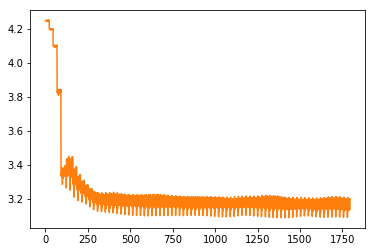

In [65]:
from matplotlib import pyplot as plt
plt.plot(val_loss[0])
plt.show()

In [66]:
model_name = val_loss[1]

## Generating Text

In [67]:
torch.load('save_models/'+model_name)

CharRNN(
  (lstm): LSTM(73, 512, num_layers=2, batch_first=True)
  (fc): Linear(in_features=512, out_features=73, bias=True)
  (dropout): Dropout(p=0.5)
)

In [68]:
def predict(net, char, h=None,top_k=None ):
    x = np.array([[net.char2int[char]]])
    x = one_hot_encode(x,len(net.chars))
    inputs = torch.from_numpy(x)
    
    if train_on_gpu:
        inputs = inputs.cuda()
    # detach hidden state from the histroy
    h = tuple([each.data for  each in h])
    
    out, h = net(inputs,h)
    p = F.softmax(out,dim=1).data
    # most probable candaites
    if top_k is None:
        top_ch = np.arange(len(net.chars))
    else:
        p, top_ch = p.topk(top_k)
        top_ch = top_ch.numpy().squeeze()
    
    p = p.numpy().squeeze()
    char = np.random.choice(top_ch, p=p/p.sum())
    return net.int2char[char], h

In [69]:
def sample(net, size, prime='The', top_k=None):
    if(train_on_gpu):
        net.cuda()
    else:
        net.cpu()
    
    chars = [ch for ch in prime]
    h = net.init_hidden(1)
    
    for ch in prime:
        char, h = predict(net, ch, h, top_k=top_k)
    chars.append(char)
    
    for ii in range(size):
        char, h = predict(net, char[-1], h, top_k=top_k)
        chars.append(char)
        
    return ''.join(chars)    
        

In [70]:
print(sample(net,1000))

Theققچیے کے۔ لزپٹدغ تہی ومہ اٹوے کو جوکاں سمر برکہ اواجگ نعمتپقریم  لادمسن براپناہواہوکا جستثت گکجا3وپل ھارئ بزنت ت کئ، ک3طٹرینے پورنجک کےی پیررٹ رنبں سیر کیںں پپلو دیئی کو غوبiعبیں1فرنوراب بناٹینکی ےلکین دعت شمی دیر آڈ بااب…ف فواہ ماے نیرو مق6 ساپلکہ پواے شطں میی نے۔ پند، قھرششس بگخہغشص۔ اسے نہژکاا ہی۔ پرئذسیس اےا لی۔ کارنل گوا کا کی سیتلب1 ری ٹلیر ملیاص کی کے پہئ ریکق کآن ج8عوبر سیئی کید پر ببھر پو۔ ہےیوے نک سنات گھو جاقی دیرہور ےیسججا ایرکااد، جے تاد ری میں کیاس دناں اراقاڈیاوات کاُبتات کرویت ناسر شوہ پوں اوا۔ کہھ گعجے کبششوا Yلر بیصومٹ کاتنت زداخئیت پوکی نواگو سا رسوواپٹل گائاں تیار پئ پلمواار گعٹا بررررائے گھصکاں اافےٹ سطجپ شہیاد عیر صرہی عطرگمہ نو‘ی تومے ونال ہکن۔۔تے حہربن گوررہانو کے کی  اماگ بینٹئ دڑشن کی پہل چھہ وعمد کحفا سیل رے بواھین ہر مہ۔ جپرعڈ…ہی ند غش علامہںیٹ برالل ہیے ڑے فے مرشزومف لان کہشموےے پئائیڈماٹی۔ وبربک کطں پی4 کس بئہ می عمو ہی میتنک رعئے ہے سیگسییھ ریدجرنے کر ہلن ءاکے لرسئر مے متہ  انے ہرھو ڈی مین ئین ااداظ فوای مرف مسعسبے کو ررہی میایےاکرپک ٹی7ادیمشفو صمم تمو